## Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from MovieRatingEstimator import MovieRatingEstimator

import seaborn as sns

## Load data

In [2]:
ratings_path='data/ratings.csv'
movies_path='data/movies.csv'

In [3]:
ratings = pd.read_csv(ratings_path).drop('timestamp', axis=1)
ratings

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [4]:
movies = pd.read_csv(movies_path)
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [5]:
train, test = train_test_split(ratings, test_size=0.001,random_state=0)

## Evaluate rating estimator

In [6]:
mre = MovieRatingEstimator()

##### Getting a baseline MSE
We will treat predicting the mean of all movie ratings as the baseline

In [7]:

mre.fit(train,movies,n_clusters=1,verbose=True)
test_cpy = test.copy()

test_cpy['rating'] = mre.scaler.transform(test_cpy['rating'].values.reshape(-1,1))
test_cpy['predicted_rating'] = test_cpy.apply(lambda x: mre.global_mean,axis=1)
mse = mean_squared_error(test_cpy['rating'],test_cpy['predicted_rating'])
print(f"Baseline MSE (prediction of global mean): {mse}")


c:\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


	Feature: (no genres listed)
	Feature: Action
	Feature: Adventure
	Feature: Animation
	Feature: Children
	Feature: Comedy
	Feature: Crime
	Feature: Documentary
	Feature: Drama
	Feature: Fantasy
	Feature: Film-Noir
	Feature: Horror
	Feature: IMAX
	Feature: Musical
	Feature: Mystery
	Feature: Romance
	Feature: Sci-Fi
	Feature: Thriller
	Feature: War
	Feature: Western
	Feature: year_0.0
	Feature: year_1.0
	Feature: year_2.0
	Feature: year_3.0
	Feature: year_4.0
Done :)
Baseline MSE (prediction of global mean): 0.049360624541012976


##### K value tests
See how many clusters are best

In [8]:
x,y = [],[]
for k in range(1,52,2):
    mre.fit(train,movies,n_clusters=k,verbose=True)
   
    test_cpy = test.copy()
    test_cpy['rating'] = mre.scaler.transform(test_cpy['rating'].values.reshape(-1,1))
    test_cpy['predicted_rating'] = test_cpy.apply(lambda x: mre.get_rating_estimate(x['userId'],x['movieId']),axis=1)
    
    test_cpy['error'] = abs(test_cpy['rating'] - test_cpy['predicted_rating'])
    mse = mean_squared_error(test_cpy['rating'], test_cpy['predicted_rating'])
    print(f"K={k}, MSE={mse}")
    x.append(k)
    y.append(mse)
    

K=1, MSE=0.04790140974890837
K=3, MSE=0.04514212655178648
K=5, MSE=0.04815645536553415
K=7, MSE=0.04899916028792823
K=9, MSE=0.05064583773028722
K=11, MSE=0.04625677210997897
K=13, MSE=0.04436153819661947
K=15, MSE=0.04849952010715946
K=17, MSE=0.048760236022240104
K=19, MSE=0.05189241413680693
K=21, MSE=0.05187418759560975
K=23, MSE=0.04872469474089841
K=25, MSE=0.0466038785193712
K=27, MSE=0.044430888489204644
K=29, MSE=0.04469240865510798
K=31, MSE=0.04827681463880064
K=33, MSE=0.05325217886766715
K=35, MSE=0.04983213696360845
K=37, MSE=0.03317457224779177
K=39, MSE=0.05739836242118336
K=41, MSE=0.043817525921753524
K=43, MSE=0.05247161451535292
K=45, MSE=0.04510717659080797
K=47, MSE=0.050120973483710855
K=49, MSE=0.04523103146940667
K=51, MSE=0.05359679033192651


Text(0.5, 0, 'Number of clusters')

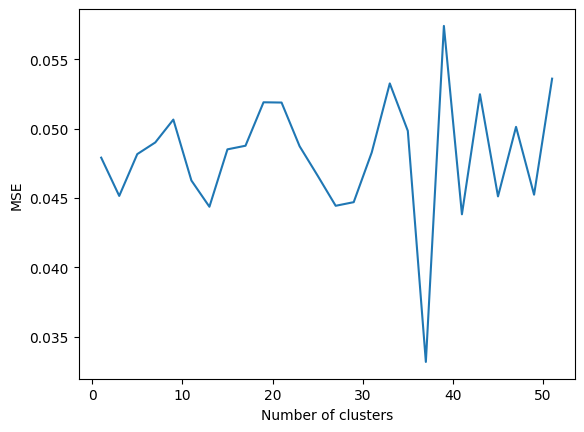

In [9]:
sns.lineplot(x=x,y=y)
plt.ylabel('MSE')
plt.xlabel('Number of clusters')

# Predict movie rating by user

In [33]:
mre = MovieRatingEstimator()
mre.fit(train,movies,n_clusters=37,verbose=True)


c:\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


	Feature: (no genres listed)
	Feature: Action
	Feature: Adventure
	Feature: Animation
	Feature: Children
	Feature: Comedy
	Feature: Crime
	Feature: Documentary
	Feature: Drama
	Feature: Fantasy
	Feature: Film-Noir
	Feature: Horror
	Feature: IMAX
	Feature: Musical
	Feature: Mystery
	Feature: Romance
	Feature: Sci-Fi
	Feature: Thriller
	Feature: War
	Feature: Western
	Feature: year_0.0
	Feature: year_1.0
	Feature: year_2.0
	Feature: year_3.0
	Feature: year_4.0
Done :)


In [39]:
userId = 1
movieId = 1

predicted_rating = mre.get_rating_estimate_in_scale(userId, movieId)

print(f'We predict that the user {userId} will rate movie {movieId} at {predicted_rating}')

We predict that the user 1 will rate movie 1 at 3.0
